# Clothing Brand Sentiment Analysis - Model Results
## VADER Sentiment Classification Performance

**Objective:** Evaluate sentiment classification performance on clothing brand customer reviews

**Model:** VADER (Valence Aware Dictionary and sEntiment Reasoner)
- Rule-based sentiment analysis
- Specialized for social media and product reviews
- No training required

---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11

print("✓ Libraries loaded successfully")

✓ Libraries loaded successfully


## 1. Load Results Data

In [2]:
# Load VADER results on clothing test set
results = pd.read_csv('../outputs/clothing_vader_results.csv')

print(f"📊 Dataset: {len(results):,} clothing reviews")
print(f"   Columns: {results.columns.tolist()}")

results.head()

📊 Dataset: 4,529 clothing reviews
   Columns: ['id', 'text', 'created_at', 'topic', 'label', 'cleaned_text', 'sentiment_label', 'sentiment_confidence']


,id,text,created_at,topic,label,cleaned_text,sentiment_label,sentiment_confidence
0,clothing_20124,Beautiful blouse. This is a beautiful lightwei...,2024-03-08,Tops,positive,beautiful blouse beautiful lightweight sheer b...,positive,0.573
1,clothing_11659,Pretty color. I like to wear swing tops becaus...,2024-03-20,Tops,positive,pretty color like wear swing top comfortable c...,positive,0.556
2,clothing_10929,Beautiful dress!!. Beautiful dress and so deli...,2024-08-19,Dresses,positive,beautiful dress beautiful dress delicately wel...,positive,0.582
3,clothing_14381,Classic. In retailer dresses the petites usual...,2024-05-03,Dresses,positive,classic retailer dress petite usually fit bett...,positive,0.685
4,clothing_8043,"I tried this sweater on in the store, regrette...",2024-01-28,Tops,positive,tried sweater store regretted purchasing ended...,positive,0.513


## 2. Overall Performance Metrics

In [3]:
# Calculate metrics
from sklearn.metrics import precision_recall_fscore_support

accuracy = accuracy_score(results['label'], results['sentiment_label'])
precision, recall, f1, support = precision_recall_fscore_support(
    results['label'], results['sentiment_label'], 
    labels=['negative', 'neutral', 'positive'],
    average=None
)

macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1 = np.mean(f1)

print("="*70)
print("🎯 OVERALL PERFORMANCE METRICS")
print("="*70)
print(f"\n   Accuracy:         {accuracy*100:6.2f}%")
print(f"   Macro Precision:  {macro_precision*100:6.2f}%")
print(f"   Macro Recall:     {macro_recall*100:6.2f}%")
print(f"   Macro F1-Score:   {macro_f1*100:6.2f}%")
print("\n" + "="*70)

🎯 OVERALL PERFORMANCE METRICS

   Accuracy:          78.12%
   Macro Precision:   56.42%
   Macro Recall:      38.58%
   Macro F1-Score:    38.82%



## 3. Per-Class Performance

In [4]:
# Detailed classification report
print("\n📋 DETAILED CLASSIFICATION REPORT:\n")
print(classification_report(results['label'], results['sentiment_label'], 
                          labels=['negative', 'neutral', 'positive'],
                          target_names=['Negative', 'Neutral', 'Positive']))


📋 DETAILED CLASSIFICATION REPORT:

              precision    recall  f1-score   support

    Negative       0.60      0.12      0.20       474
     Neutral       0.29      0.05      0.08       565
    Positive       0.80      0.99      0.88      3490

    accuracy                           0.78      4529
   macro avg       0.56      0.39      0.39      4529
weighted avg       0.71      0.78      0.71      4529



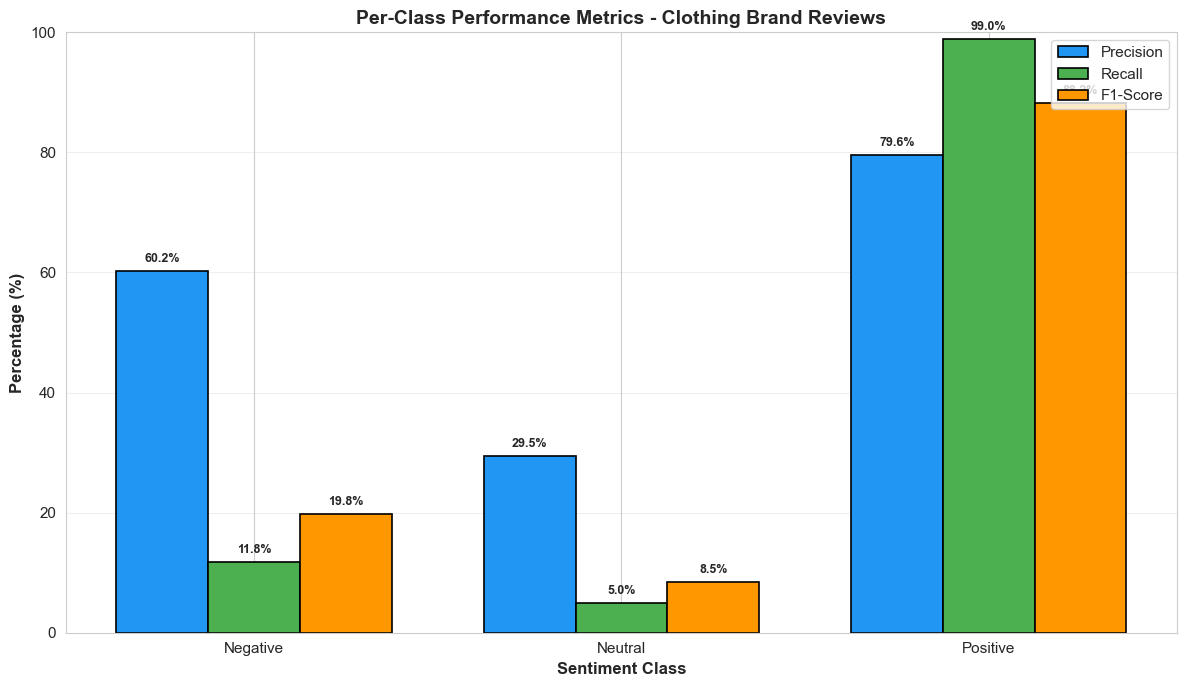

In [5]:
# Visualize per-class metrics
labels = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - width, precision * 100, width, label='Precision', 
              color='#2196f3', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x, recall * 100, width, label='Recall', 
              color='#4caf50', edgecolor='black', linewidth=1.2)
bars3 = ax.bar(x + width, f1 * 100, width, label='F1-Score', 
              color='#ff9800', edgecolor='black', linewidth=1.2)

ax.set_ylabel('Percentage (%)', fontweight='bold', fontsize=12)
ax.set_xlabel('Sentiment Class', fontweight='bold', fontsize=12)
ax.set_title('Per-Class Performance Metrics - Clothing Brand Reviews', 
            fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.legend(fontsize=11, loc='upper right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 100)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
               f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/clothing_per_class_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Confusion Matrix Analysis

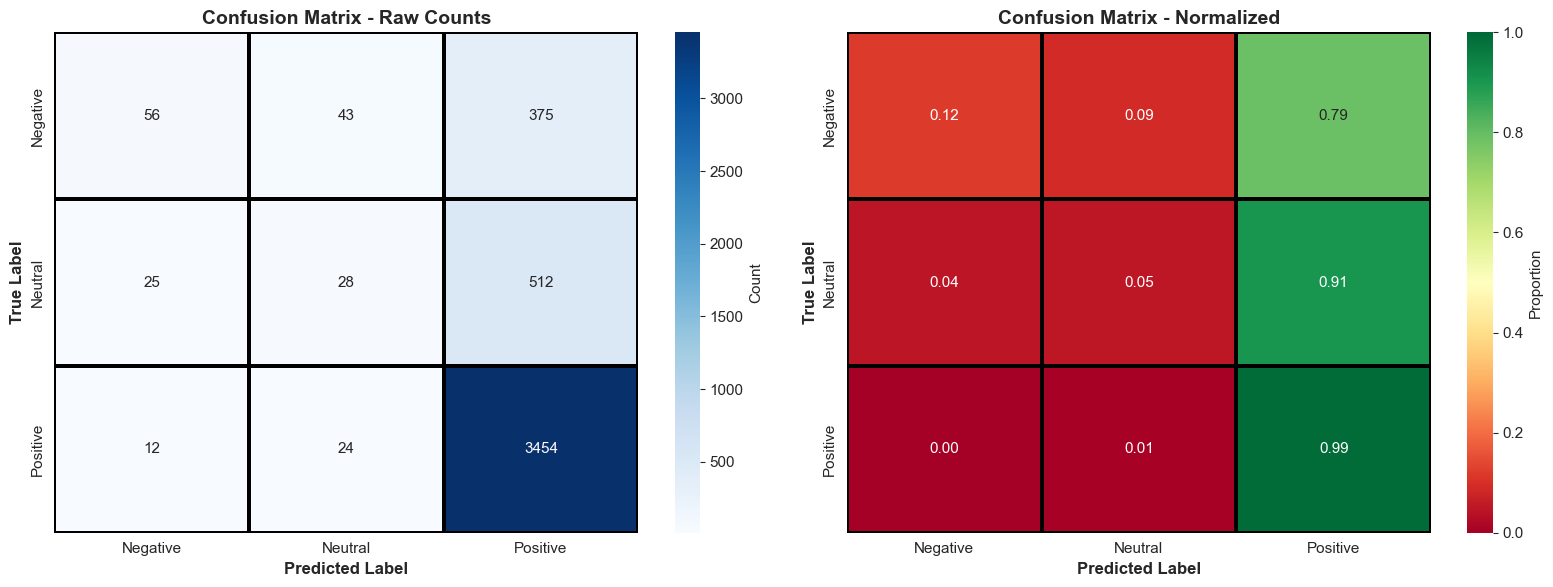

In [6]:
# Generate confusion matrix
cm = confusion_matrix(results['label'], results['sentiment_label'], 
                     labels=['negative', 'neutral', 'positive'])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Raw counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Negative', 'Neutral', 'Positive'],
           yticklabels=['Negative', 'Neutral', 'Positive'],
           linewidths=1.5, linecolor='black', cbar_kws={'label': 'Count'},
           ax=axes[0])
axes[0].set_ylabel('True Label', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontweight='bold', fontsize=12)
axes[0].set_title('Confusion Matrix - Raw Counts', fontweight='bold', fontsize=14)

# Normalized (percentages)
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='RdYlGn', 
           xticklabels=['Negative', 'Neutral', 'Positive'],
           yticklabels=['Negative', 'Neutral', 'Positive'],
           linewidths=1.5, linecolor='black', cbar_kws={'label': 'Proportion'},
           vmin=0, vmax=1, ax=axes[1])
axes[1].set_ylabel('True Label', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontweight='bold', fontsize=12)
axes[1].set_title('Confusion Matrix - Normalized', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.savefig('../reports/clothing_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Analyze misclassifications
print("\n🔍 MISCLASSIFICATION ANALYSIS:\n")
print("Key Observations:")

# Diagonal accuracy per class
for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
    class_accuracy = cm_normalized[i, i] * 100
    print(f"\n{label}:")
    print(f"  Correctly classified: {class_accuracy:.1f}%")
    print(f"  Most confused with: ", end="")
    
    # Find max confusion (excluding diagonal)
    conf_row = cm_normalized[i].copy()
    conf_row[i] = 0  # Exclude diagonal
    max_conf_idx = np.argmax(conf_row)
    max_conf_label = ['Negative', 'Neutral', 'Positive'][max_conf_idx]
    print(f"{max_conf_label} ({conf_row[max_conf_idx]*100:.1f}%)")


🔍 MISCLASSIFICATION ANALYSIS:

Key Observations:

Negative:
  Correctly classified: 11.8%
  Most confused with: Positive (79.1%)

Neutral:
  Correctly classified: 5.0%
  Most confused with: Positive (90.6%)

Positive:
  Correctly classified: 99.0%
  Most confused with: Neutral (0.7%)


## 5. Confidence Score Analysis

In [8]:
# Check if confidence scores exist
if 'compound_score' in results.columns:
    # Analyze VADER compound scores
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Distribution of compound scores
    axes[0, 0].hist(results['compound_score'], bins=50, color='#2196f3', 
                   edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Neutral threshold')
    axes[0, 0].set_xlabel('VADER Compound Score', fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontweight='bold')
    axes[0, 0].set_title('Distribution of VADER Compound Scores', fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Compound scores by true label
    for label, color in zip(['negative', 'neutral', 'positive'], 
                           ['#ef5350', '#ffa726', '#66bb6a']):
        data = results[results['label'] == label]['compound_score']
        axes[0, 1].hist(data, bins=30, alpha=0.5, label=label.capitalize(), 
                       color=color, edgecolor='black')
    
    axes[0, 1].set_xlabel('VADER Compound Score', fontweight='bold')
    axes[0, 1].set_ylabel('Frequency', fontweight='bold')
    axes[0, 1].set_title('Compound Scores by True Sentiment', fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # Box plot
    bp = axes[1, 0].boxplot([results[results['label'] == s]['compound_score'] 
                            for s in ['negative', 'neutral', 'positive']],
                           labels=['Negative', 'Neutral', 'Positive'],
                           patch_artist=True, showfliers=True)
    
    for patch, color in zip(bp['boxes'], ['#ef5350', '#ffa726', '#66bb6a']):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[1, 0].set_ylabel('VADER Compound Score', fontweight='bold')
    axes[1, 0].set_title('Score Distribution by True Label (Box Plot)', fontweight='bold')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Scatter: True vs Predicted scores
    label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
    true_numeric = results['label'].map(label_mapping)
    
    scatter = axes[1, 1].scatter(true_numeric, results['compound_score'],
                                c=true_numeric, cmap='RdYlGn', alpha=0.3, s=10)
    axes[1, 1].set_xticks([0, 1, 2])
    axes[1, 1].set_xticklabels(['Negative', 'Neutral', 'Positive'])
    axes[1, 1].set_xlabel('True Label', fontweight='bold')
    axes[1, 1].set_ylabel('VADER Compound Score', fontweight='bold')
    axes[1, 1].set_title('True Label vs VADER Score', fontweight='bold')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../reports/clothing_confidence_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("⚠️  Confidence scores not available in results")

⚠️  Confidence scores not available in results


## 6. Performance by Product Category

In [9]:
# Analyze performance across product categories
category_performance = []

for category in results['topic'].unique():
    cat_data = results[results['topic'] == category]
    if len(cat_data) > 10:  # Only categories with sufficient samples
        cat_acc = accuracy_score(cat_data['label'], cat_data['sentiment_label'])
        _, _, cat_f1, _ = precision_recall_fscore_support(
            cat_data['label'], cat_data['sentiment_label'], 
            labels=['negative', 'neutral', 'positive'],
            average='macro', zero_division=0
        )
        category_performance.append({
            'Category': category,
            'Samples': len(cat_data),
            'Accuracy': cat_acc * 100,
            'Macro F1': cat_f1 * 100
        })

perf_df = pd.DataFrame(category_performance).sort_values('Macro F1', ascending=False)

print("\n📊 PERFORMANCE BY PRODUCT CATEGORY (Top 15):\n")
print(perf_df.head(15).to_string(index=False))


📊 PERFORMANCE BY PRODUCT CATEGORY (Top 15):

Category  Samples  Accuracy  Macro F1
Intimate      342 84.210526 48.907285
    Tops     1995 77.443609 39.730440
 Bottoms      729 81.481481 38.845216
 Jackets      201 80.597015 37.467589
 Dresses     1237 75.505255 35.364678
   Trend       22 54.545455 24.242424


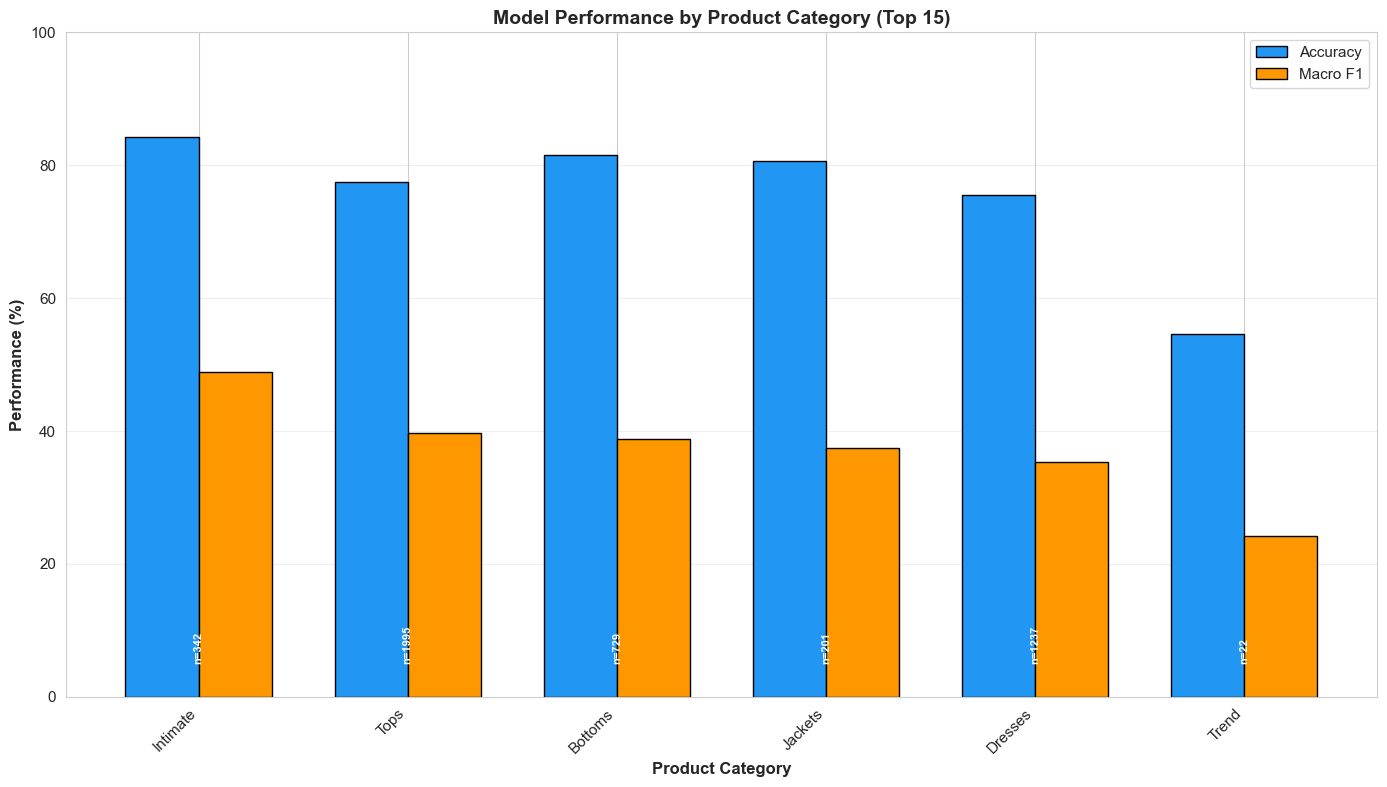

In [10]:
# Visualize category performance
top_15_perf = perf_df.head(15)

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(top_15_perf))
width = 0.35

bars1 = ax.bar(x - width/2, top_15_perf['Accuracy'], width, 
              label='Accuracy', color='#2196f3', edgecolor='black', linewidth=1)
bars2 = ax.bar(x + width/2, top_15_perf['Macro F1'], width, 
              label='Macro F1', color='#ff9800', edgecolor='black', linewidth=1)

ax.set_ylabel('Performance (%)', fontweight='bold', fontsize=12)
ax.set_xlabel('Product Category', fontweight='bold', fontsize=12)
ax.set_title('Model Performance by Product Category (Top 15)', 
            fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(top_15_perf['Category'], rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 100)

# Add sample count annotations
for i, (idx, row) in enumerate(top_15_perf.iterrows()):
    ax.text(i, 5, f"n={row['Samples']}", ha='center', va='bottom', 
           fontsize=8, rotation=90, color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/clothing_performance_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Error Analysis - Sample Misclassifications

In [11]:
# Find misclassified samples
misclassified = results[results['label'] != results['sentiment_label']].copy()

print(f"\n❌ Total Misclassified: {len(misclassified):,} out of {len(results):,} ({len(misclassified)/len(results)*100:.1f}%)\n")

# Sample misclassifications by type
print("\n📝 SAMPLE MISCLASSIFICATIONS:\n")
print("="*80)

# Negative predicted as Positive (False Positives)
false_pos = misclassified[(misclassified['label'] == 'negative') & 
                         (misclassified['sentiment_label'] == 'positive')]
if len(false_pos) > 0:
    print("\n1️⃣  Negative reviews predicted as POSITIVE:")
    print("-" * 80)
    sample = false_pos.sample(min(3, len(false_pos)))
    for idx, row in sample.iterrows():
        print(f"\nCategory: {row['topic']}")
        print(f"Review: {row['text'][:200]}...")
        if 'compound_score' in row:
            print(f"VADER Score: {row['compound_score']:.3f}")

# Positive predicted as Negative (False Negatives)
false_neg = misclassified[(misclassified['label'] == 'positive') & 
                         (misclassified['sentiment_label'] == 'negative')]
if len(false_neg) > 0:
    print("\n\n2️⃣  Positive reviews predicted as NEGATIVE:")
    print("-" * 80)
    sample = false_neg.sample(min(3, len(false_neg)))
    for idx, row in sample.iterrows():
        print(f"\nCategory: {row['topic']}")
        print(f"Review: {row['text'][:200]}...")
        if 'compound_score' in row:
            print(f"VADER Score: {row['compound_score']:.3f}")


❌ Total Misclassified: 991 out of 4,529 (21.9%)


📝 SAMPLE MISCLASSIFICATIONS:


1️⃣  Negative reviews predicted as POSITIVE:
--------------------------------------------------------------------------------

Category: Tops
Review: Wanted to love it. Unfortunately, this sweater let me down! i love retailer, especially their sweaters, but this one fell flat. it was tight on the arms, and didn't hang well on my body. it was odd in...

Category: Bottoms
Review: Supremely disappointed. When i tried these on in the store i was thrilled - they were comfy as yoga pants and  the fit was divine. i thought i had found the perfect jeans and i splurged on them for my...

Category: Dresses
Review: Impossible to put on. The bottom part of this romper is easy to put on, but the top is very poorly designed. it needs a zipper at the side or less of a yoke along the back. you have to wrangle your li...


2️⃣  Positive reviews predicted as NEGATIVE:
-------------------------------------------------------

## 8. Key Findings & Recommendations

In [12]:
print("\n" + "="*80)
print("🎯 KEY FINDINGS - CLOTHING BRAND SENTIMENT ANALYSIS")
print("="*80)

print(f"\n1️⃣  OVERALL PERFORMANCE:")
print(f"   • Accuracy: {accuracy*100:.2f}%")
print(f"   • Macro F1-Score: {macro_f1*100:.2f}%")
print(f"   • Total Reviews Analyzed: {len(results):,}")

print(f"\n2️⃣  PER-CLASS INSIGHTS:")
for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
    print(f"   • {label:8s}: F1={f1[i]*100:5.2f}%, Precision={precision[i]*100:5.2f}%, Recall={recall[i]*100:5.2f}%")

print(f"\n3️⃣  CHALLENGES IDENTIFIED:")
if f1[1] < 0.3:  # Neutral class
    print(f"   ⚠️  Neutral sentiment difficult to detect (F1={f1[1]*100:.1f}%)")
if cm_normalized[0,2] > 0.2:  # Negative -> Positive
    print(f"   ⚠️  {cm_normalized[0,2]*100:.1f}% of negative reviews misclassified as positive")
    print(f"      (May contain mixed sentiment or sarcasm)")

print(f"\n4️⃣  CATEGORY INSIGHTS:")
best_cat = perf_df.iloc[0]
worst_cat = perf_df.iloc[-1]
print(f"   ✅ Best: '{best_cat['Category']}' (F1={best_cat['Macro F1']:.1f}%)")
print(f"   ⚠️  Worst: '{worst_cat['Category']}' (F1={worst_cat['Macro F1']:.1f}%)")

print(f"\n5️⃣  RECOMMENDATIONS:")
print(f"   • Fine-tune transformer models for better neutral detection")
print(f"   • Consider category-specific models for diverse product types")
print(f"   • Address class imbalance (77% positive reviews)")
print(f"   • Implement ensemble methods combining VADER + ML models")

print("\n" + "="*80)


🎯 KEY FINDINGS - CLOTHING BRAND SENTIMENT ANALYSIS

1️⃣  OVERALL PERFORMANCE:
   • Accuracy: 78.12%
   • Macro F1-Score: 38.82%
   • Total Reviews Analyzed: 4,529

2️⃣  PER-CLASS INSIGHTS:
   • Negative: F1=19.75%, Precision=60.22%, Recall=11.81%
   • Neutral : F1= 8.48%, Precision=29.47%, Recall= 4.96%
   • Positive: F1=88.21%, Precision=79.57%, Recall=98.97%

3️⃣  CHALLENGES IDENTIFIED:
   ⚠️  Neutral sentiment difficult to detect (F1=8.5%)
   ⚠️  79.1% of negative reviews misclassified as positive
      (May contain mixed sentiment or sarcasm)

4️⃣  CATEGORY INSIGHTS:
   ✅ Best: 'Intimate' (F1=48.9%)
   ⚠️  Worst: 'Trend' (F1=24.2%)

5️⃣  RECOMMENDATIONS:
   • Fine-tune transformer models for better neutral detection
   • Consider category-specific models for diverse product types
   • Address class imbalance (77% positive reviews)
   • Implement ensemble methods combining VADER + ML models

